# Image Demosaicing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from colour_demosaicing import masks_CFA_Bayer
from timeit import default_timer as timer
from accelerated_nonten import nonten
from accelerated_nonten_BPCG import nonten_BPCG

from utils import plot_channel, the_to_q, q_to_the

In [4]:
shape = (90, 60)
start = (100, 100)
image = imread('image/oski.png', 'png')   
image = image[start[0]:start[0]+shape[0], start[1]:start[1]+shape[1], :]

bayer_filter = np.stack(masks_CFA_Bayer(shape), axis=-1).astype(float)
mosaic_image = image * bayer_filter

In [9]:
imread('image/oski.png', 'png')  

array([[[ 0.6313726 ,  0.64705884,  0.6431373 ],
        [ 0.67058825,  0.6862745 ,  0.68235296],
        [ 0.7294118 ,  0.74509805,  0.7411765 ],
        ..., 
        [ 0.8235294 ,  0.827451  ,  0.84705883],
        [ 0.8235294 ,  0.827451  ,  0.84705883],
        [ 0.8235294 ,  0.827451  ,  0.84705883]],

       [[ 0.6313726 ,  0.64705884,  0.6431373 ],
        [ 0.6745098 ,  0.6901961 ,  0.6862745 ],
        [ 0.7294118 ,  0.74509805,  0.7411765 ],
        ..., 
        [ 0.827451  ,  0.83137256,  0.8509804 ],
        [ 0.827451  ,  0.83137256,  0.8509804 ],
        [ 0.827451  ,  0.83137256,  0.8509804 ]],

       [[ 0.63529414,  0.6509804 ,  0.64705884],
        [ 0.6745098 ,  0.6901961 ,  0.6862745 ],
        [ 0.73333335,  0.7490196 ,  0.74509805],
        ..., 
        [ 0.83137256,  0.8352941 ,  0.85490197],
        [ 0.83137256,  0.8352941 ,  0.85490197],
        [ 0.83137256,  0.8352941 ,  0.85490197]],

       ..., 
       [[ 0.7529412 ,  0.77254903,  0.7882353 ],
        

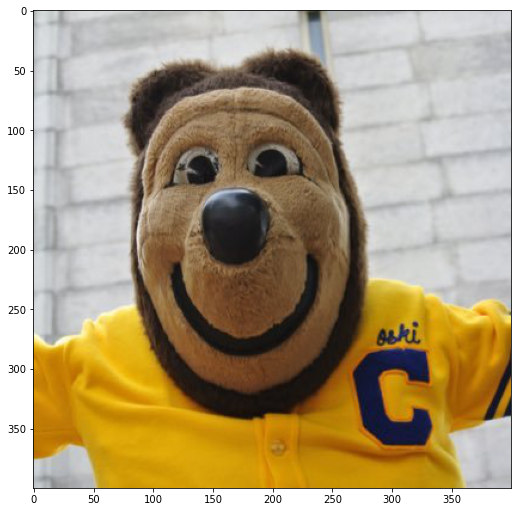

In [10]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(imread('image/oski.png', 'png'))

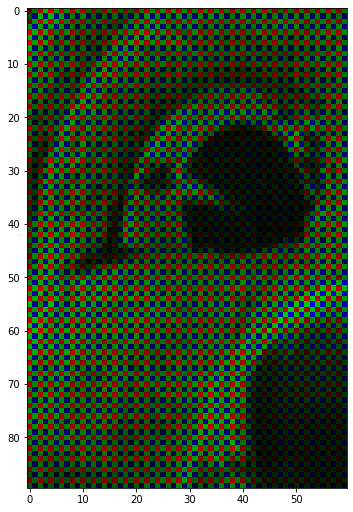

In [5]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(mosaic_image)

In [6]:
X = np.argwhere(bayer_filter.flatten() == 1).flatten()
Y = mosaic_image.flatten()[X]
r = mosaic_image.shape

In [7]:
rng = np.random.default_rng(112)
out_2 = nonten(X, Y, r, rng, lpar = 2.5, tol = 1e-4, verbose = True, indices=True, pattern=True, sparse=True, nag=True)
im = out_2[0].reshape(image.shape)
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(im)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-21
Set parameter TimeLimit to value 100
Set parameter Method to value 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 21600 rows, 5553 columns and 54000 nonzeros
Model fingerprint: 0x5508f5cb
Variable types: 5400 continuous, 153 integer (153 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 2e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%

   Active Sets   |           Objective Bounds            |         Work
  Size